In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score,silhouette_score,davies_bouldin_score
from sklearn.preprocessing import LabelEncoder,Normalizer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy.stats import skew,normaltest,boxcox
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,RandomForestRegressor
from sklearn.cluster import KMeans

## classification

### Data Preprocessing

In [2]:
df= pd.read_csv('ObesityDataset.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
print(df.isna().sum())
print(df.isna().sum().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
0


In [4]:
print('No of duplicates in dataset:',df.duplicated().sum())
print('No of rows and columns',df.shape)
df=df.drop_duplicates()
print('No of duplicates in dataset:',df.duplicated().sum())
print('No of rows and columns',df.shape)

No of duplicates in dataset: 24
No of rows and columns (2111, 16)
No of duplicates in dataset: 0
No of rows and columns (2087, 16)


In [5]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
df['Gender'].value_counts()

Gender
Male      1052
Female    1035
Name: count, dtype: int64

In [7]:
le = LabelEncoder() 
df.loc[:,'Gender']=le.fit_transform(df['Gender']).astype('int')
le_gen=dict(zip(le.classes_, range(len(le.classes_))))
df.loc[:,'family_history_with_overweight']=le.fit_transform(df['family_history_with_overweight']).astype('int')
le_fam_his=dict(zip(le.classes_, range(len(le.classes_))))
df.loc[:,'FAVC']=le.fit_transform(df['FAVC']).astype('int')
le_favc=dict(zip(le.classes_, range(len(le.classes_))))
df.loc[:,'CAEC']=le.fit_transform(df['CAEC']).astype('int')
le_caec=dict(zip(le.classes_, range(len(le.classes_))))
df.loc[:,'SMOKE']=le.fit_transform(df['SMOKE']).astype('int')
le_smoke=dict(zip(le.classes_, range(len(le.classes_))))
df.loc[:,'CALC']=le.fit_transform(df['CALC']).astype('int')
le_calc=dict(zip(le.classes_, range(len(le.classes_))))
df.loc[:,'MTRANS']=le.fit_transform(df['MTRANS']).astype('int')
le_tran=dict(zip(le.classes_, range(len(le.classes_))))
df.loc[:,'NObeyesdad']=le.fit_transform(df['NObeyesdad']).astype('int')
le_obe=dict(zip(le.classes_, range(len(le.classes_))))

In [8]:
print('Lable encoding of gender column : ',le_gen)
print('Lable encoding of family history of overweight column : ',le_fam_his)
print('Lable encoding of FAVC column : ',le_favc)
print('Lable encoding of CAEC column : ',le_caec)
print('Lable encoding of smoke column : ',le_smoke)
print('Lable encoding of CALC column : ',le_calc)
print('Lable encoding of MTRANS column : ',le_tran)
print('Lable encoding of NObeyesdad column : ',le_obe)

Lable encoding of gender column :  {'Female': 0, 'Male': 1}
Lable encoding of family history of overweight column :  {'no': 0, 'yes': 1}
Lable encoding of FAVC column :  {'no': 0, 'yes': 1}
Lable encoding of CAEC column :  {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
Lable encoding of smoke column :  {'no': 0, 'yes': 1}
Lable encoding of CALC column :  {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
Lable encoding of MTRANS column :  {'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}
Lable encoding of NObeyesdad column :  {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


In [9]:
df.loc[:,'FCVC']=df['FCVC'].astype('float')
df.loc[:,'Age']=df['Age'].astype('int')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0.000000,1.000000,3,3,1
1,0,21.0,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,3.000000,0.000000,2,3,1
2,1,23.0,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,2.000000,1.000000,1,3,1
3,1,27.0,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,2.000000,0.000000,1,4,5
4,1,22.0,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.0,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,1.676269,0.906247,2,3,4
2107,0,21.0,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,1.341390,0.599270,2,3,4
2108,0,22.0,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,1.414209,0.646288,2,3,4
2109,0,24.0,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,1.139107,0.586035,2,3,4


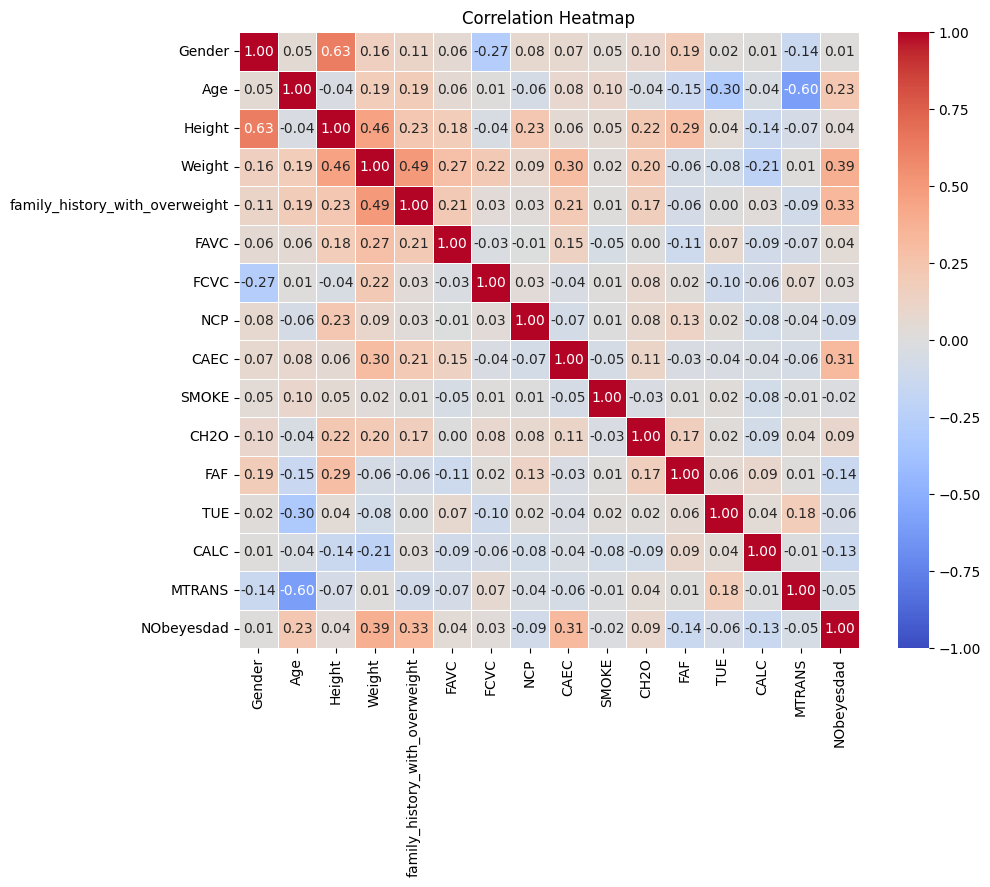

In [10]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
df = df.astype('float')
for i in df.columns:
    print(f'{i} :')
    print(f'Result of normal test of column {i} :',normaltest(df[i]))
    print(f'Skewness of column {i} :',df[i].skew())

Gender :
Result of normal test of column Gender : NormaltestResult(statistic=np.float64(7461.297064963694), pvalue=np.float64(0.0))
Skewness of column Gender : -0.016303588070711788
Age :
Result of normal test of column Age : NormaltestResult(statistic=np.float64(604.2915291975719), pvalue=np.float64(6.022290546640199e-132))
Skewness of column Age : 1.5472968841807884
Height :
Result of normal test of column Height : NormaltestResult(statistic=np.float64(53.41531994072163), pvalue=np.float64(2.5177386702049178e-12))
Skewness of column Height : -0.024743014272176542
Weight :
Result of normal test of column Weight : NormaltestResult(statistic=np.float64(131.45222197365436), pvalue=np.float64(2.854385861040333e-29))
Skewness of column Weight : 0.2419021286149897
family_history_with_overweight :
Result of normal test of column family_history_with_overweight : NormaltestResult(statistic=np.float64(555.7796246170437), pvalue=np.float64(2.0605726791572308e-121))
Skewness of column family_hist

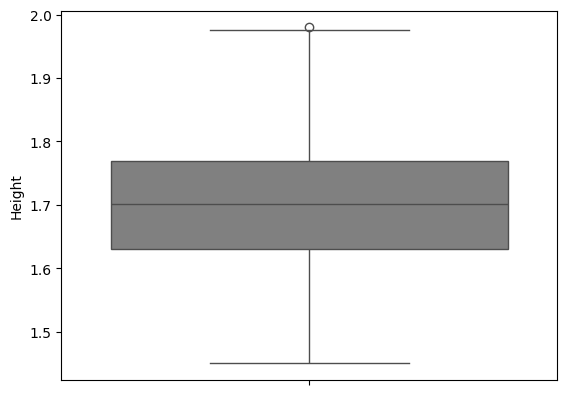

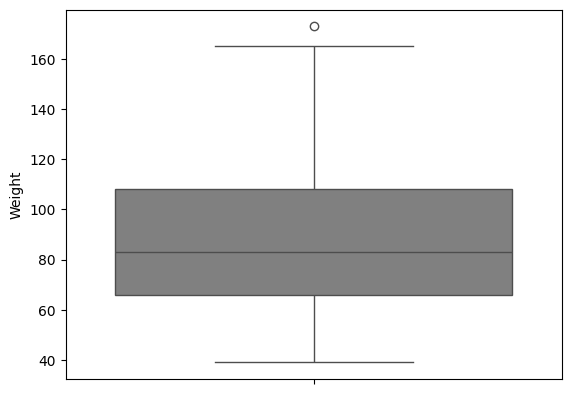

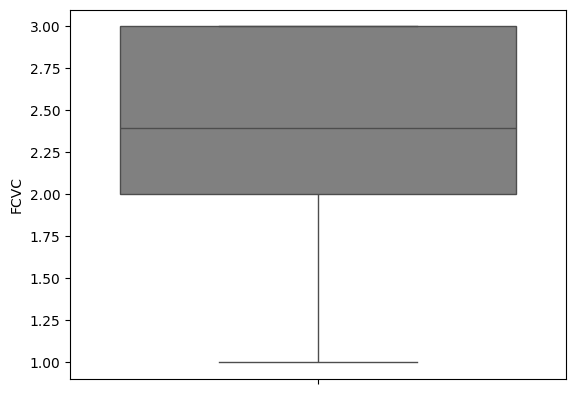

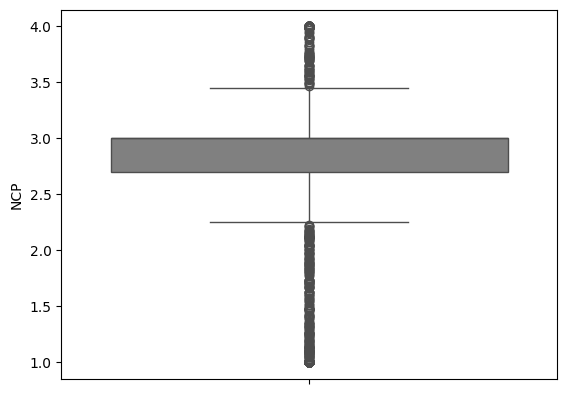

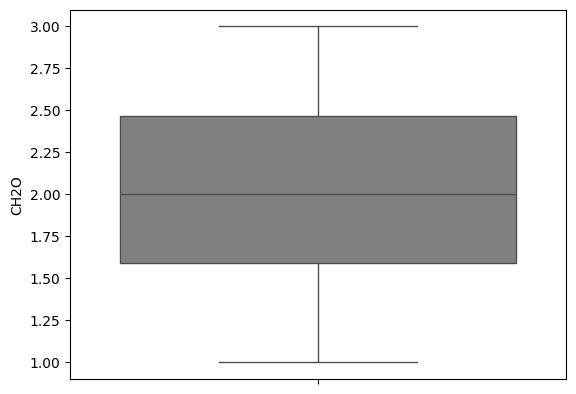

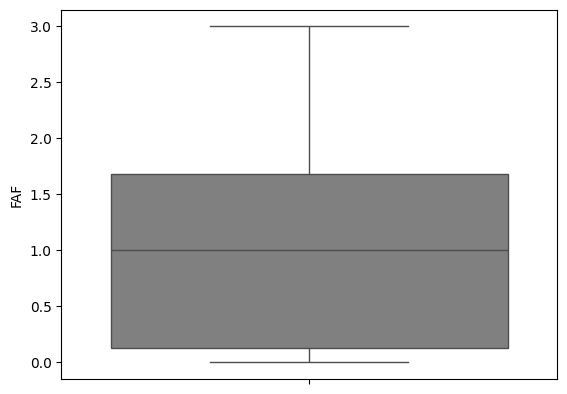

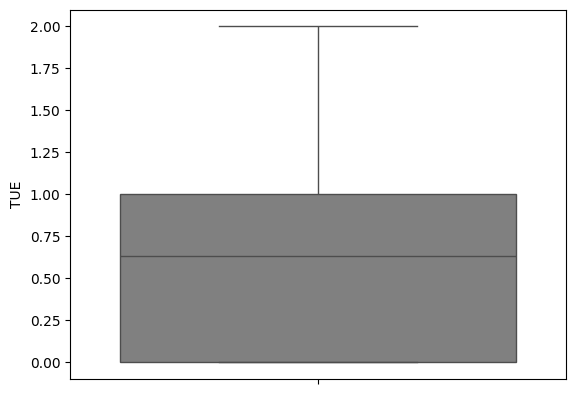

In [12]:
df1 = ['Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
for i in df1:
 sns.boxplot(df[i],color='gray',label='Box plot')
 plt.show()

In [13]:
for i in df1:
    print(f'{i} :')
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[ (df[i] < lower_bound) | (df[i] > upper_bound) ]
    print('lower bound :',lower_bound)
    print('upper bound :',upper_bound)
    print('Min :',df[i].min())
    print('Max :',df[i].max())
    df[i]=df[i].clip(lower_bound,upper_bound)
    print(f'No of outliers in {i}',outliers.shape[0])

Height :
lower bound : 1.421209
upper bound : 1.978461
Min : 1.45
Max : 1.98
No of outliers in Height 1
Weight :
lower bound : 2.976139500000002
upper bound : 171.03976749999998
Min : 39.0
Max : 173.0
No of outliers in Weight 1
FCVC :
lower bound : 0.5
upper bound : 4.5
Min : 1.0
Max : 3.0
No of outliers in FCVC 0
NCP :
lower bound : 2.2436675
upper bound : 3.4537994999999997
Min : 1.0
Max : 4.0
No of outliers in NCP 577
CH2O :
lower bound : 0.2780150000000001
upper bound : 3.779099
Min : 1.0
Max : 3.0
No of outliers in CH2O 0
FAF :
lower bound : -2.2058904999999998
upper bound : 4.0084975
Min : 0.0
Max : 3.0
No of outliers in FAF 0
TUE :
lower bound : -1.5
upper bound : 2.5
Min : 0.0
Max : 2.0
No of outliers in TUE 0


In [14]:
df_scaled = df.copy()
df1 = ['Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
scalar = StandardScaler()
df_scaled.loc[:,df1] = scalar.fit_transform(df_scaled[df1])
df_scaled

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,21.0,-0.887421,-0.873051,1.0,0.0,-0.788364,0.401080,2.0,0.0,-0.007810,-1.186977,0.554211,3.0,3.0,1.0
1,0.0,21.0,-1.960826,-1.178610,1.0,0.0,1.082164,0.401080,2.0,1.0,1.636552,2.328908,-1.090505,2.0,3.0,1.0
2,1.0,23.0,1.044709,-0.376517,1.0,0.0,-0.788364,0.401080,2.0,0.0,-0.007810,1.156947,0.554211,1.0,3.0,1.0
3,1.0,27.0,1.044709,0.005432,0.0,0.0,1.082164,0.401080,2.0,0.0,-0.007810,1.156947,-1.090505,1.0,4.0,5.0
4,1.0,22.0,0.830028,0.112377,0.0,0.0,-0.788364,-1.720013,2.0,0.0,-0.007810,-1.186977,-1.090505,2.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,20.0,0.086480,1.701610,1.0,1.0,1.082164,0.401080,2.0,0.0,-0.454848,0.777546,0.400014,2.0,3.0,4.0
2107,0.0,21.0,0.492807,1.790773,1.0,1.0,1.082164,0.401080,2.0,0.0,0.000626,0.385081,-0.104876,2.0,3.0,4.0
2108,0.0,22.0,0.531686,1.788726,1.0,1.0,1.082164,0.401080,2.0,0.0,0.081303,0.470422,-0.027545,2.0,3.0,4.0
2109,0.0,24.0,0.394762,1.775636,1.0,1.0,1.082164,0.401080,2.0,0.0,1.393744,0.148013,-0.126644,2.0,3.0,4.0


### Feature selection using PCA

In [15]:
x=df_scaled.iloc[:,:-1]
y=df_scaled.iloc[:,-1]
feature_names=x.columns
pca = PCA(n_components=6) 
df_pca = pca.fit_transform(x)
df_pca = pd.DataFrame(df_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
loadings = pca.components_  
loadings_df = pd.DataFrame(loadings, index=['PC1','PC2','PC3','PC4','PC5','PC6'],columns=feature_names)
most_influential_features = {}
for pc in loadings_df.columns:
    most_influential_features[pc] = loadings_df[pc].abs().idxmax()
print("Most influential original features for each principal component:")
for pc, feature in most_influential_features.items():
    print(f"{pc}: {feature}")
loadings_df

Most influential original features for each principal component:
Gender: PC2
Age: PC1
Height: PC2
Weight: PC2
family_history_with_overweight: PC2
FAVC: PC4
FCVC: PC4
NCP: PC6
CAEC: PC4
SMOKE: PC6
CH2O: PC5
FAF: PC5
TUE: PC6
CALC: PC5
MTRANS: PC3


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,TUE,CALC,MTRANS
PC1,0.004277,0.990397,-0.005326,0.029401,0.011439,0.002898,0.001470,-0.014703,0.006082,0.002149,-0.007182,-0.023521,-0.048794,-0.003613,-0.121678
PC2,0.170626,-0.005943,0.612815,0.494081,0.100323,0.042030,0.120888,0.252217,0.057977,0.003546,0.392369,0.309985,0.007478,-0.072270,-0.049371
PC3,-0.141308,0.037127,-0.152331,0.408415,0.060955,0.018759,0.491758,-0.220865,0.049521,0.000949,0.093177,-0.353422,-0.159609,-0.066912,0.572692
PC4,-0.159633,-0.031208,-0.216759,-0.216078,-0.075658,-0.063338,0.594071,0.438343,-0.079322,-0.003286,0.030566,0.256464,-0.443884,0.008476,-0.234420
PC5,-0.031832,0.048073,-0.163296,-0.269957,-0.042254,-0.062338,0.080720,-0.492090,-0.007014,-0.001323,0.510566,0.566831,0.119230,0.089026,0.196536
PC6,-0.111892,0.087783,-0.170509,-0.109990,-0.011019,-0.012172,0.088653,0.563375,-0.068330,0.009800,0.097173,0.010599,0.698683,-0.013149,0.332314


### Model training

In [16]:
x_train,x_test,y_train,y_test=train_test_split(df_pca,y,test_size=0.3,random_state=42)

In [17]:
log_reg = LogisticRegression(max_iter=1000,solver='newton-cholesky')
decision_tree = DecisionTreeClassifier(max_depth=8)
svm = SVC(kernel='rbf',random_state=42)
random_forest = RandomForestClassifier(n_estimators=100,random_state=42)
base_estimator = DecisionTreeClassifier(max_depth=6)
adaboost = AdaBoostClassifier(estimator=base_estimator,n_estimators=250,random_state=42)

In [18]:
log_reg.fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
svm.fit(x_train, y_train)
random_forest.fit(x_train, y_train)
adaboost.fit(x_train, y_train)

c:\Users\Cv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=6),
                   n_estimators=250, random_state=42)

In [19]:
y_pred_log_reg = log_reg.predict(x_test)
y_pred_decision_tree = decision_tree.predict(x_test)
y_pred_svm = svm.predict(x_test)
y_pred_random_forest = random_forest.predict(x_test)
y_pred_adaboost = adaboost.predict(x_test)

In [20]:
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)

In [21]:
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print(f"Decision Tree Accuracy: {accuracy_decision_tree}")
print(f"SVM Accuracy: {accuracy_svm}")
print(f"Random Forest Accuracy: {accuracy_random_forest}")
print(f"AdaBoost Accuracy: {accuracy_adaboost}")

Logistic Regression Accuracy: 0.5311004784688995
Decision Tree Accuracy: 0.5901116427432217
SVM Accuracy: 0.5964912280701754
Random Forest Accuracy: 0.7639553429027113
AdaBoost Accuracy: 0.7511961722488039


## Regression

### Data Preperation

In [22]:
df['BMI'] = (df['Weight']) / ( df['Height'] * df['Height'])

In [23]:

Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[ (df['BMI'] < lower_bound) | (df['BMI'] > upper_bound) ]
print('lower bound :',lower_bound)
print('upper bound :',upper_bound)
print('Min :',df['BMI'].min())
print('Max :',df['BMI'].max())
print(f'No of outliers in BMI',outliers.shape[0])
outliers

lower bound : 6.778936340082453
upper bound : 53.68549831241154
Min : 12.998684889724604
Max : 50.81175280566433
No of outliers in BMI 0


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI


In [24]:
df_scaled = df.copy()
df1 = ['Height','Weight','FCVC','NCP','CH2O','FAF','TUE','BMI']
scalar = StandardScaler()
df_scaled.loc[:,df1] = scalar.fit_transform(df_scaled[df1])
df_scaled

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0.0,21.0,-0.887421,-0.873051,1.0,0.0,-0.788364,0.401080,2.0,0.0,-0.007810,-1.186977,0.554211,3.0,3.0,1.0,-0.670499
1,0.0,21.0,-1.960826,-1.178610,1.0,0.0,1.082164,0.401080,2.0,1.0,1.636552,2.328908,-1.090505,2.0,3.0,1.0,-0.688984
2,1.0,23.0,1.044709,-0.376517,1.0,0.0,-0.788364,0.401080,2.0,0.0,-0.007810,1.156947,0.554211,1.0,3.0,1.0,-0.747919
3,1.0,27.0,1.044709,0.005432,0.0,0.0,1.082164,0.401080,2.0,0.0,-0.007810,1.156947,-1.090505,1.0,4.0,5.0,-0.363192
4,1.0,22.0,0.830028,0.112377,0.0,0.0,-0.788364,-1.720013,2.0,0.0,-0.007810,-1.186977,-1.090505,2.0,3.0,6.0,-0.177396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,20.0,0.086480,1.701610,1.0,1.0,1.082164,0.401080,2.0,0.0,-0.454848,0.777546,0.400014,2.0,3.0,4.0,1.886720
2107,0.0,21.0,0.492807,1.790773,1.0,1.0,1.082164,0.401080,2.0,0.0,0.000626,0.385081,-0.104876,2.0,3.0,4.0,1.742180
2108,0.0,22.0,0.531686,1.788726,1.0,1.0,1.082164,0.401080,2.0,0.0,0.081303,0.470422,-0.027545,2.0,3.0,4.0,1.717486
2109,0.0,24.0,0.394762,1.775636,1.0,1.0,1.082164,0.401080,2.0,0.0,1.393744,0.148013,-0.126644,2.0,3.0,4.0,1.783267


### Model training and evaluation

In [25]:
x = df_scaled[['Age', 'Height', 'BMI']]
y = df_scaled['Weight']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [27]:
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()
svr = SVR()

In [28]:
linear_reg.fit(x_train, y_train)
decision_tree_reg.fit(x_train, y_train)
random_forest_reg.fit(x_train, y_train)
svr.fit(x_train, y_train)

SVR()

In [29]:
linear_reg.fit(x_train, y_train)
decision_tree_reg.fit(x_train, y_train)
random_forest_reg.fit(x_train, y_train)
svr.fit(x_train, y_train)

SVR()

In [30]:
y_pred_linear = linear_reg.predict(x_test)
y_pred_decision_tree = decision_tree_reg.predict(x_test)
y_pred_random_forest = random_forest_reg.predict(x_test)
y_pred_svr = svr.predict(x_test)

In [31]:
print('Linear Regression Performance:')
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_linear))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_linear))
print('R2 Score:', r2_score(y_test, y_pred_linear))
print('Decision tree Performance:')
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_decision_tree))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_decision_tree))
print('R2 Score:', r2_score(y_test, y_pred_decision_tree))
print('Random Forest Performance:')
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_random_forest))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_random_forest))
print('R2 Score:', r2_score(y_test, y_pred_random_forest))
print('SVR Performance:')
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_svr))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_svr))
print('R2 Score:', r2_score(y_test, y_pred_svr))

Linear Regression Performance:
Mean Absolute Error (MAE): 0.0711151906541276
Mean Squared Error (MSE): 0.008828692291060754
R2 Score: 0.9911278632699343
Decision tree Performance:
Mean Absolute Error (MAE): 0.030272444664834395
Mean Squared Error (MSE): 0.002540256587037635
R2 Score: 0.9974472432579321
Random Forest Performance:
Mean Absolute Error (MAE): 0.022127225795595323
Mean Squared Error (MSE): 0.0015844338237802557
R2 Score: 0.9984077694565759
SVR Performance:
Mean Absolute Error (MAE): 0.0734210251012705
Mean Squared Error (MSE): 0.009624833017018476
R2 Score: 0.9903278048757571


## Clustering

### Data Preperation

In [32]:
x = df_scaled[['Age', 'Height', 'BMI','Weight']]

### Elbow Method

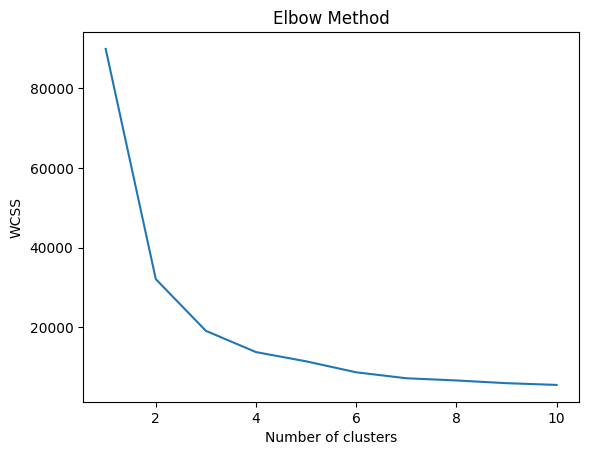

In [33]:
wcss =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Kmeans implimentation

In [34]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit_predict(x)


array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [35]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_
print(centers)
print(labels)

[[ 3.43519814e+01  7.95128095e-02  1.90912478e-01  2.06877024e-01]
 [ 2.13329312e+01 -2.05735798e-02 -4.93977402e-02 -5.35284941e-02]]
[1 1 1 ... 1 1 1]


### Silhouette Score & Davies Bouldin Score

In [36]:
silhouette_avg = silhouette_score(x, labels)
davies_bouldin = davies_bouldin_score(x, labels)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin}')

Silhouette Score: 0.6241033386349337
Davies-Bouldin Index: 0.5879233444466958


### Clustering Visualization

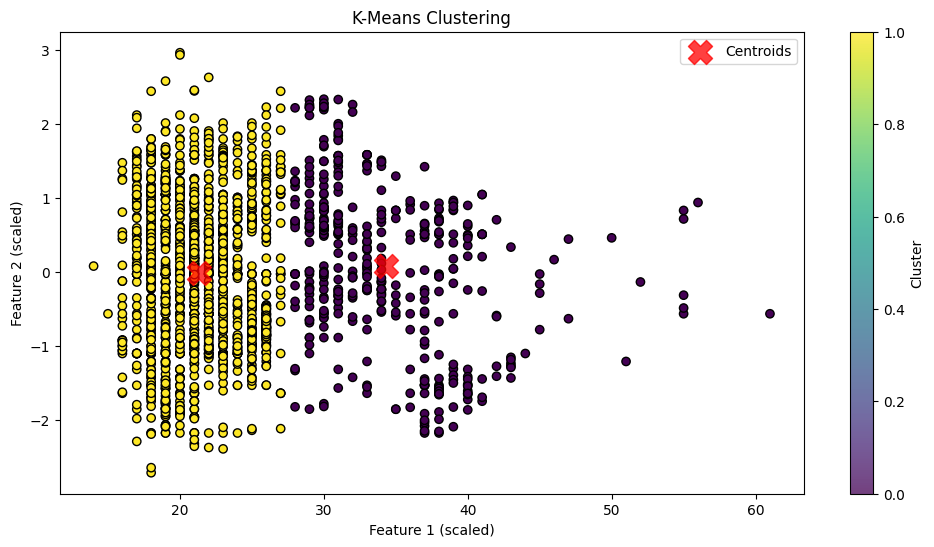

In [37]:
plt.figure(figsize=(12, 6))
plt.scatter(x.loc[:,'Age'], x.loc[:,'Height'], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.75, marker='X', label='Centroids')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('K-Means Clustering')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()